In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_csv = pd.read_csv('train_values.csv')

In [3]:
train_labels_csv = pd.read_csv('train_labels.csv')

In [4]:
train_csv.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labels_csv.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
df = train_csv.merge(train_labels_csv,on = 'building_id')

In [7]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [8]:
df.columns.values

array(['building_id', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_s

In [9]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [10]:
datatype = df.dtypes
datatype

categorical_data = datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()
categorical_data

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [11]:
test_df = pd.read_csv('test_values.csv')

In [12]:
test_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [13]:
datatype_test = test_df.dtypes
datatype_test

categorical_data_test = datatype_test[(datatype_test == 'object') | (datatype_test == 'category')].index.tolist()
categorical_data_test

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [14]:
import seaborn as sns

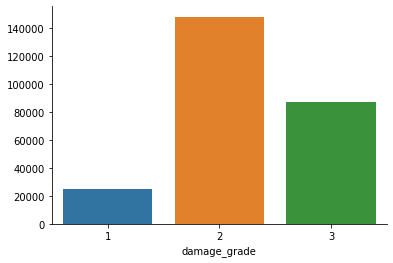

In [15]:
g = sns.countplot(df.damage_grade)
sns.despine()
g.set_xlabel('damage_grade')
g.set_ylabel('')
plt.show()

In [16]:
# Drop from train.
df.drop('building_id', axis=1, inplace=True)

# Store, then drop from test.
test_building_id = test_df.building_id
test_df.drop('building_id', axis=1, inplace=True)

## Encoding Categorical Values

In [17]:
from sklearn.preprocessing import OneHotEncoder


# Create and fit encoder.
train_categorical_cols = df.select_dtypes('object').columns
encoder = OneHotEncoder(sparse=False, dtype=np.int, handle_unknown='ignore')
encoder.fit(df[train_categorical_cols])

# Transform train data.
df = pd.concat([
    df.drop(train_categorical_cols, axis=1),
    pd.DataFrame(encoder.transform(df[train_categorical_cols]), columns=encoder.get_feature_names(train_categorical_cols))
], axis=1)

# Transform test data.
test_categorical_cols = test_df.select_dtypes('object').columns
test_df = pd.concat([
    test_df.drop(test_categorical_cols, axis=1),
    pd.DataFrame(encoder.transform(test_df[test_categorical_cols]), columns=encoder.get_feature_names(test_categorical_cols))
], axis=1)

In [18]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
test_df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,17,596,11307,3,20,7,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,6,141,11987,2,25,13,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,22,19,10044,2,5,4,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,26,39,633,1,0,19,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,17,289,7970,3,15,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### Seperating target and features

In [20]:
df['damage_grade']

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [21]:
X = df.drop('damage_grade', axis = 1)
y = df.damage_grade

In [22]:
X.skew()

geo_level_1_id               0.272530
geo_level_2_id               0.028957
geo_level_3_id               0.000394
count_floors_pre_eq          0.834113
age                         12.192494
                              ...    
plan_configuration_u         8.272369
legal_ownership_status_a     6.655897
legal_ownership_status_r    13.188109
legal_ownership_status_v    -4.900054
legal_ownership_status_w     9.713888
Length: 68, dtype: float64

In [23]:

X['age'] = np.log(X.age.replace(0, np.nan)).replace(np.nan, 0)

In [24]:
X.skew()

geo_level_1_id               0.272530
geo_level_2_id               0.028957
geo_level_3_id               0.000394
count_floors_pre_eq          0.834113
age                         -0.600266
                              ...    
plan_configuration_u         8.272369
legal_ownership_status_a     6.655897
legal_ownership_status_r    13.188109
legal_ownership_status_v    -4.900054
legal_ownership_status_w     9.713888
Length: 68, dtype: float64

#### Scaling 


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Create and apply to train.
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
# Apply to test.
test_df[test_df.columns] = scaler.transform(test_df)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
kfold = KFold(n_splits=5)

rf_params = {
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [2, 4, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 3, 4, 5]
}

cv_rf = RandomizedSearchCV(
    RandomForestClassifier(bootstrap=False, random_state=42),
    rf_params,
    n_iter=40, cv=kfold, scoring=['accuracy', 'f1_micro'], random_state=42, n_jobs=-1, iid=True, refit='f1_micro'
)
cv_rf.fit(X, y)

C:\Users\Ashish Bisht\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    random_state=42),
                   iid=True, n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 8, 10, 12, 14, 16,
                                                      18, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [200]},
                   random_state=42, refit='f1_micro',
                   scoring=['accuracy', 'f1_micro'])

In [27]:
cv_rf.best_score_

0.7007647706647326

In [29]:
cv_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 20}

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [32]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, RandomizedSearchCV
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)


In [34]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_micro', n_jobs=-1, cv=skf.split(X,y), verbose=10, random_state=1001 )

# Here we go
random_search.fit(X, y)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 22.1min remaining: 143.5min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 29.7min remaining: 81.6min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 29.9min remaining: 44.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 30.0min remaining: 26.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 43.2min remaining: 21.6min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 48.6min remaining: 12.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 52.5min finished


[13:29:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001A3B7ADDB48>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, mis...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           subsa

In [35]:
random_search.best_score_

0.7004424388241027

In [36]:
random_search.best_params_

{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

## Stacking


In [37]:
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier

In [40]:
models = [
    
        
    RandomForestClassifier(random_state=0, n_jobs=-1,min_samples_split = 5,max_features = 'sqrt',
                           n_estimators=200, max_depth=20),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, subsample = 0.6,gamma= 1.5,
                 colsample_bytree= 0.8, min_child_weight=  1, max_depth=5)
]

In [44]:
S_train, S_test = stacking(models,                   
                           X, y, test_df,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=True,
         
                           save_dir=None, 
            
                           metric='f1_micro', 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0)

In [46]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=5)
    
model = model.fit(S_train, y)

In [47]:
y_pred = model.predict(S_test)

In [54]:
y_pred

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [51]:
submission = pd.DataFrame({
    'building_id': test_building_id,
    'damage_grade': y_pred
})

submission.to_csv('./submit.csv', index=False)

In [53]:
submission

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3
...,...,...
86863,310028,2
86864,663567,2
86865,1049160,2
86866,442785,2
